### Download train.csv and test.csv from LMS material2, do the following steps:

1. EDA

2. Missing value imputation on missing Age, try replacing missing Age with the mean age of same Sex and Pclass.

3. Build a logistic regression model and plot the ROC curve. 

4. Get the AUC value

5. Set a proper threshold and create confusion matrix

6. Evaluate the result

EDA, 即探索性数据分析（Exploratory Data Analysis），是指对已有的数据(特别是调查或观察得来的原始数据)在尽量少的先验假定下进行探索，
通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

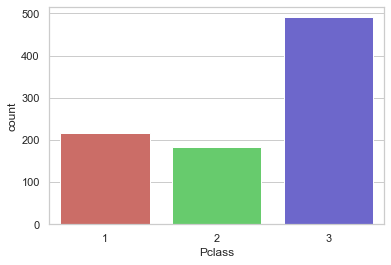

<Figure size 432x288 with 0 Axes>

In [6]:
test['Pclass'].value_counts()
sns.countplot(x='Pclass', data=train,palette='hls')
plt.show()
plt.savefig('count_plot')

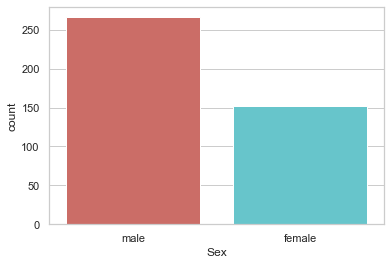

<Figure size 432x288 with 0 Axes>

In [7]:
test['Sex'].value_counts()
sns.countplot(x='Sex', data=test, palette='hls')
plt.show()
plt.savefig('count_plot')

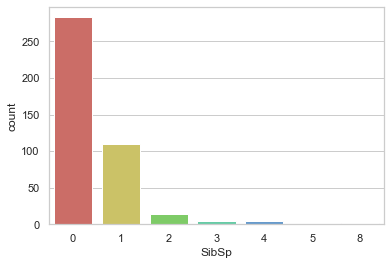

<Figure size 432x288 with 0 Axes>

In [8]:
test['SibSp'].value_counts()
sns.countplot(x='SibSp', data=test, palette='hls')
plt.show()
plt.savefig('count_plot')

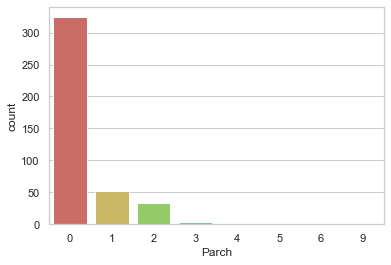

<Figure size 432x288 with 0 Axes>

In [9]:
test['Parch'].value_counts()
sns.countplot(x='Parch', data=test,palette='hls')
plt.show()
plt.savefig('count_plot')

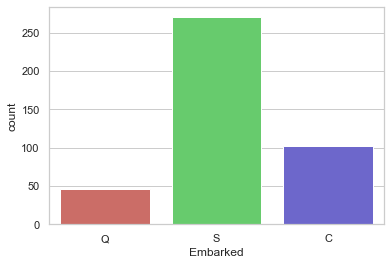

<Figure size 432x288 with 0 Axes>

In [10]:
test['Embarked'].value_counts()
sns.countplot(x='Embarked', data=test, palette='hls')
plt.show()
plt.savefig('count_plot')

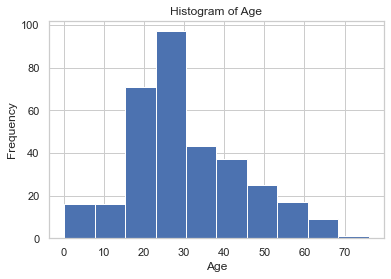

In [11]:
test.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.shape

(891, 12)

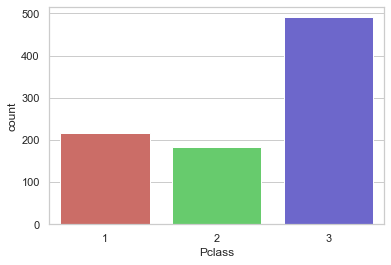

<Figure size 432x288 with 0 Axes>

In [16]:
train['Pclass'].value_counts()
sns.countplot(x='Pclass', data=train, palette='hls')
plt.show()
plt.savefig('count_plot')

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


male      577
female    314
Name: Sex, dtype: int64

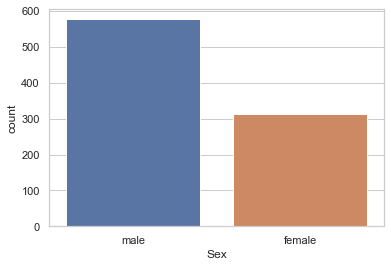

In [17]:
sns.countplot('Sex',data=train)
train['Sex'].value_counts()

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

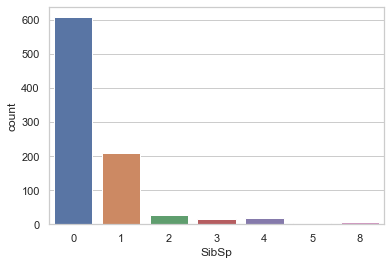

In [18]:
sns.countplot('SibSp', data=train)
train['SibSp'].value_counts()

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


S    644
C    168
Q     77
Name: Embarked, dtype: int64

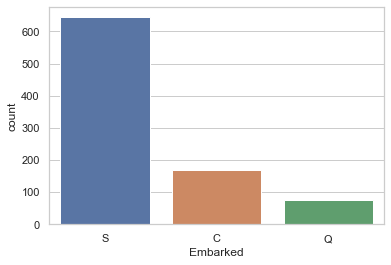

In [19]:
sns.countplot('Embarked', data=train)
train['Embarked'].value_counts()

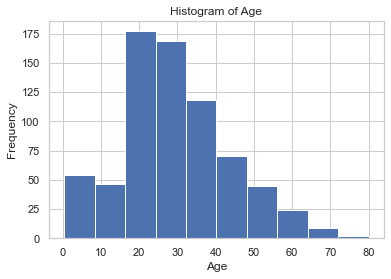

In [20]:
train.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

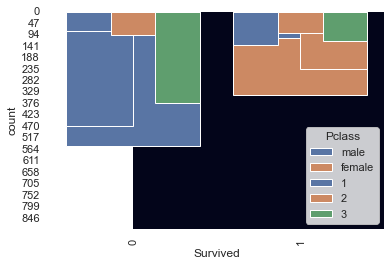

In [21]:
sns.heatmap(train.isnull(), cbar=False)
sns.countplot(x='Survived', data=train)
sns.countplot(x='Survived', hue='Sex', data=train)
sns.countplot(x='Survived', hue='Pclass', data=train)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


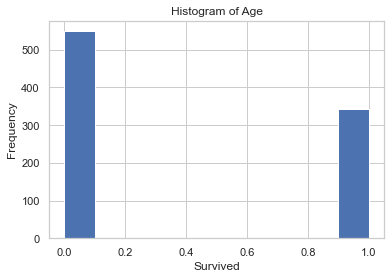

In [26]:
train.Survived.hist()
plt.title('Histogram of Age')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.savefig('hist_Survived')

,Sex,Survived
0,female,0.742038
1,male,0.188908


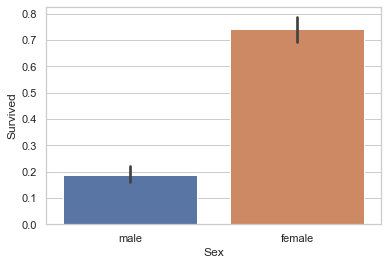

In [27]:
#Percentage of passengers survived grouped by gender
sns.barplot(x='Sex',y='Survived',data=train)
train.groupby('Sex',as_index=False).Survived.mean()

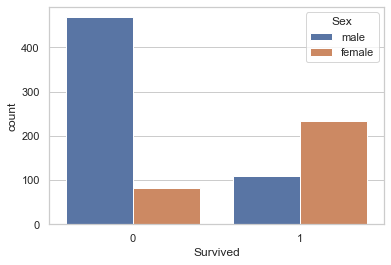

In [28]:
#Count of passengers survived based on gender
sns.countplot(x='Survived', hue='Sex', data=train)

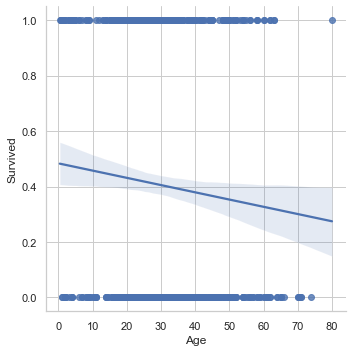

In [29]:
#Age group which is more likely to survive
sns.lmplot(x='Age',y='Survived',data=train)

In [30]:
#Correlation Matrix
train.drop('PassengerId',axis = 1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


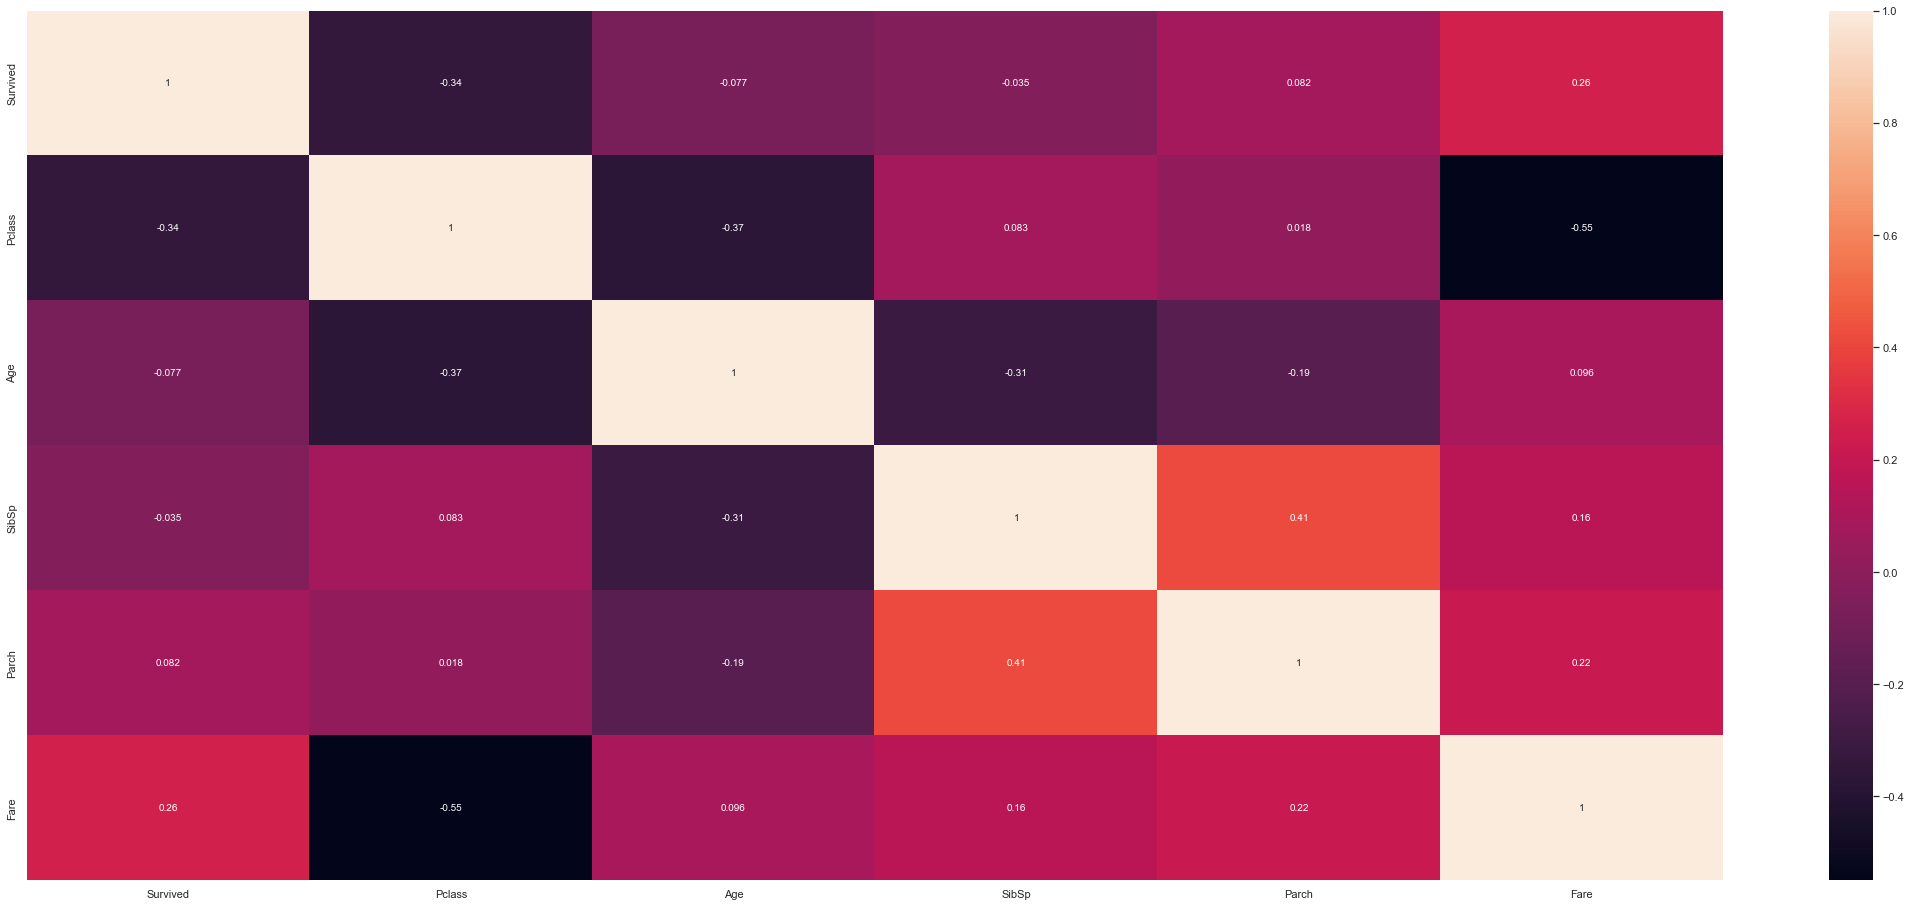

In [31]:
plt.figure(figsize = (38,16))
sns.heatmap(train.drop('PassengerId',axis = 1).corr(), annot = True)
# plt.savefig('heatmap.png')
plt.show()

### Missing value imputation on missing Age, try replacing missing Age with the mean age of same Sex and Pclass.

In [32]:
import pandas as pd

# 统计缺失值数量missing=data.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例missing['missRate']=missing['missNum']/data.shape[0]
# 按照缺失率排序显示miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
# miss_analy 
# 存储的是每个变量缺失情况的数据框

In [33]:
missing=test.isnull().sum().reset_index().rename(columns={0:'missNum'})
missing['missRate']=missing['missNum']/test.shape[0]
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
miss_analy 

,index,missNum,missRate
9,Cabin,327,0.782297
4,Age,86,0.205742
8,Fare,1,0.002392


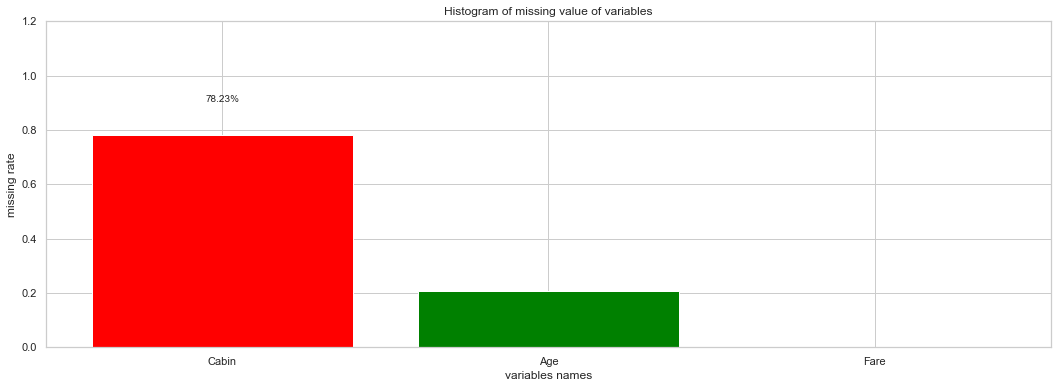

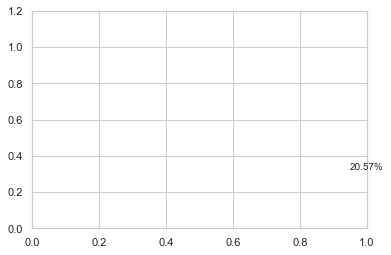

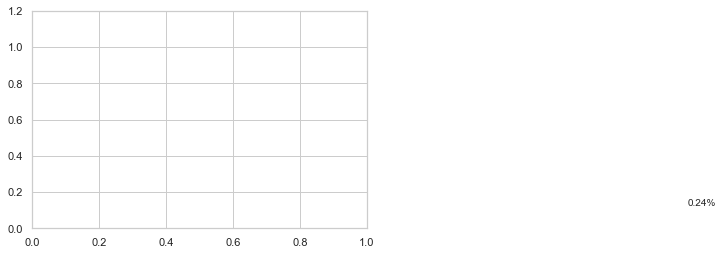

In [34]:
import matplotlib.pyplot as plt
import pylab as plt
fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',color=['red','green'])
plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')

plt.xticks(np.arange(miss_analy.shape[0]), list(miss_analy['index']))
plt.xticks()

for x,y in enumerate(list(miss_analy.missRate.values)):    
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center')    
    plt.ylim([0,1.2])
    plt.show()

In [35]:
print(test.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))

               mean  median
Sex    Pclass              
female 1       41.3    41.0
       2       24.4    24.0
       3       23.1    22.0
male   1       40.5    42.0
       2       30.9    28.0
       3       24.5    24.0


In [36]:
meanAgeTest = test.groupby(['Pclass', 'Sex'])['Age'].transform('mean')

for df in [test]:
    df['Age'] = df['Age'].fillna(meanAgeTest)
    
meanAgeTrain = train.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
    
for df in [train]:
    df['Age'] = df['Age'].fillna(meanAgeTrain)

In [37]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Build a logistic regression model and plot the ROC curve.

In [69]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [70]:
# Set up the data
target = train['Survived']
#trainnew.drop(['Survived'], 1, inplace=True)

In [71]:
combined = train.append(test)
combined['TravelAlone']=np.where((combined["SibSp"]+combined["Parch"])>0, 0, 1)

In [72]:
# Spliting the data and Training the model
y_data = combined['Survived'] 
x_data = combined.drop('Survived', axis = 1)

In [73]:
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId', 'Name', 'Ticket','Embarked','Cabin','Survived'], inplace=True, axis=1)
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
combined.fillna(111)
combined.head()

# combined is data X, target is target y

,Pclass,Sex,Age,SibSp,Parch,Fare,TravelAlone
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,1


In [74]:
combined.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
TravelAlone    0
dtype: int64

In [46]:
combined.dtypes

Survived       float64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
TravelAlone      int32
dtype: object

In [78]:
combined['Pclass'] = combined['Pclass'].astype('int32')
combined['Sex'] = combined['Pclass'].astype('int32')
combined['SibSp'] = combined['SibSp'].astype('int32')
combined['Parch'] = combined['Parch'].astype('int32')


x_train = train['Age']

x_test = test['Age'] 

y_train = target

y_test = test['Age']

In [79]:
#Split the data set into training data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=2)

In [ ]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
lr_model.predict(x_test[0].reshape(1,-1))
lr_model.predict(x_test[0:10])

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
#Calculate performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

In [ ]:
#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions)

In [ ]:
#Prediction on the test set
y_pred = lr_model.predict(x_test)

#Predicted values
y_pred

In [ ]:
# predict probabilities
lr_probs = model.predict_proba(x_test)

In [ ]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [ ]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

In [ ]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC')
# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
# Ploting ROC Curves
plt.figure(figsize=(12,8))

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legent(log = 'lower right')
plt.plot([0,1], [0,1], 'k--')

In [ ]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

### Implementing the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

### Get the AUC value

### Set a proper threshold and create confusion matrix

In [ ]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt="d")

plt.title('Confusion Matrix')

plt.xlabel('Predicted')

plt.ylabel('True')

print(classification_report(y_test, y_pred))

### Visualize the confusion matrix using Heatmap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Evaluate the result, Confusion Matrix Evaluation Metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))